### Import packages

In [1]:
import sys
sys.path.append('../data_helpers/')
sys.path.append('../statistics/')
sys.path.append('../preprocess')
sys.path.append('../cluster/')

In [2]:
from twitter_data_helper import TwitterDataHelper
from reddit_data_helper import RedditDataHelper
from data_aggregator import DataAggregator
from statistics_aggregator import StatisticsAggregator
from text_cleaner import TextCleaner
from lda_cluster import LDACluster
from data_enhancer import DataOrganizer, SummarizeNER

/Users/Howard/anaconda/envs/digestant/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
import numpy as np
import pandas as pd
import json
import pickle
from time import time, sleep
from tqdm import tqdm

In [4]:
try:
    if text_cleaner:
        pass
except:
    from text_cleaner import TextCleaner
    text_cleaner = TextCleaner(filter_sentiment_words=True)

* [TextCleaner] Initializing...
* [TextCleaner] Loading SpaCy "en_core_web_md" corpus...
* [TextCleaner] Loading stopwords...
* [TextCleaner] Loading sentinent words...
--------------------------------------------------------------------------------------------------------------------


In [5]:
from gensim.corpora import Dictionary

### Get data

In [49]:
data_helper = DataAggregator()
date_range = ['2017-08-24', '2017-08-25']
df = data_helper.get_data(date_range=date_range)

In [50]:
df['source'].value_counts()

reddit     100
twitter     22
Name: source, dtype: int64

In [51]:
df[['source', 'created_at', 'author', 'text', 'url']]

,source,created_at,author,text,url
0,twitter,2017-08-24 08:41:19,arxiv_cscl,Automatic Detection of Fake News https://t.co/...,http://arxiv.org/abs/1708.07104
1,twitter,2017-08-24 00:42:22,arxiv_cscl,Graph-based Neural Multi-Document Summarizatio...,http://arxiv.org/abs/1706.06681
2,twitter,2017-08-24 00:42:22,arxiv_cscl,Lexicon Integrated CNN Models with Attention f...,http://arxiv.org/abs/1610.06272
3,twitter,2017-08-24 00:42:21,arxiv_cscl,Statistical Patterns in Written Language https...,http://arxiv.org/abs/1412.3336
4,twitter,2017-08-24 00:42:21,arxiv_cscl,Automatic Detection of Fake News https://t.co/...,http://arxiv.org/abs/1708.07104
5,twitter,2017-08-24 00:42:21,arxiv_cscl,A Neural Network Approach for Mixing Language ...,http://arxiv.org/abs/1708.06989
6,twitter,2017-08-24 00:42:21,arxiv_cscl,Discovering Political Topics in Facebook Discu...,http://arxiv.org/abs/1708.06872
7,twitter,2017-08-24 00:42:20,arxiv_cscl,Classification of Radiology Reports Using Neur...,http://arxiv.org/abs/1708.06828
8,twitter,2017-08-24 05:26:57,arxiv_flying,#EMNLP2017 #nlproc Automatic Detection of Fake...,http://arxiv.org/abs/1708.07104
9,twitter,2017-08-24 01:53:04,dennybritz,Inside Waymo's Secret World for Training Self-...,http://theatln.tc/2w5LGeQ


### Clean text

In [52]:
texts = df['text']

In [53]:
text_cleaner.token_blacklist.append('oc')
docs = text_cleaner.clean(texts)

122it [00:00, 1087.22it/s]

* [TextCleaner] Cleaning text...


### Word Cloud (Show Top K words)
- K = vocabulary numbers / 2

In [54]:
from gensim.corpora import Dictionary
vocab = Dictionary(docs)

from wordcloud import WordCloud
wordcloud = WordCloud(max_words=int(len(vocab)*0.5), background_color='white', width=600, height=300, max_font_size=50).generate(' '.join([' '.join(doc) for doc in docs]))

(-0.5, 599.5, 299.5, -0.5)

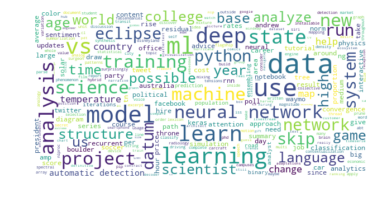

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## LDA - Topic Clustering

In [56]:
cluster = LDACluster(num_topics=10)
cluster.fit(docs)
cluster.model.print_topics()

* [LDA] Training model...


[(0,
  '0.020*"use" + 0.015*"time" + 0.015*"country" + 0.014*"data" + 0.010*"neural" + 0.010*"state" + 0.010*"datum" + 0.009*"python" + 0.009*"system" + 0.009*"college"'),
 (1,
  '0.022*"ml" + 0.018*"use" + 0.015*"model" + 0.015*"learning" + 0.014*"temperature" + 0.013*"iterations" + 0.013*"ensembling" + 0.013*"prediction" + 0.013*"data" + 0.009*"machine"'),
 (2,
  '0.017*"system" + 0.016*"year" + 0.015*"road" + 0.015*"boulder" + 0.013*"vs" + 0.012*"ml" + 0.010*"eclipse" + 0.010*"training" + 0.009*"world" + 0.009*"college"'),
 (3,
  '0.015*"age" + 0.014*"poll" + 0.014*"data" + 0.013*"use" + 0.010*"learn" + 0.010*"neural" + 0.010*"eclipse" + 0.010*"datum" + 0.009*"analysis" + 0.009*"run"'),
 (4,
  '0.032*"ml" + 0.023*"project" + 0.020*"vs" + 0.016*"structure" + 0.015*"andrew" + 0.015*"ng" + 0.015*"diagram" + 0.015*"summary" + 0.015*"data" + 0.014*"use"'),
 (5,
  '0.026*"use" + 0.016*"learning" + 0.016*"networks" + 0.016*"training" + 0.014*"residual" + 0.014*"rates" + 0.014*"large" + 0.0

### Topic distribution

In [57]:
df['cluster'] = cluster.labels
df['cluster'].value_counts()

7    20
8    17
1    13
4    11
3    11
2    11
0    11
9    10
6     9
5     9
Name: cluster, dtype: int64

### Post type distribution

In [58]:
stats_helper = StatisticsAggregator(df)
sdf = stats_helper.get_stats()

In [59]:
sdf['type'].value_counts()

unknown link                          36
image                                 19
paper                                 13
subreddit: /r/datascience             11
subreddit: /r/MachineLearning          9
blog                                   7
twitter status                         6
subreddit: /r/learnmachinelearning     5
tutorial                               3
code                                   3
news                                   2
subreddit: /r/computervision           2
subreddit: /r/BigDataJobs              1
dataset                                1
subreddit: /r/LanguageTechnology       1
subreddit: /r/MLQuestions              1
social-media                           1
subreddit: /r/MLjobs                   1
Name: type, dtype: int64

### Cross relation between post type and post sentiment

In [60]:
pd.crosstab(sdf.type,sdf.sentiment)

sentiment,neu,pos
type,,
blog,7,0
code,3,0
dataset,1,0
image,19,0
news,2,0
paper,13,0
social-media,1,0
subreddit: /r/BigDataJobs,1,0
subreddit: /r/LanguageTechnology,1,0


### Blog

In [61]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['type'] == 'blog'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*90)

* Date: 2017-08-25
* Text: [D] Andrew Ng's "Structuring a ML Project" summary in a diagram
* Link: https://medium.com/@erogol/designing-a-deep-learning-project-9b3698aef127
------------------------------------------------------------------------------------------
* Date: 2017-08-25
* Text: There are more than 140 attempts to access porn and other inappropriate content within the average enterprise every single day.
* Link: https://www.wandera.com/blog/inappropriate-mobile-activity/
------------------------------------------------------------------------------------------
* Date: 2017-08-25
* Text: Global Extreme Weather Costs [OC]
* Link: http://blog.cityprojections.com/2017/08/how-much-does-extreme-weather-currently.html
------------------------------------------------------------------------------------------
* Date: 2017-08-25
* Text: Mapping the sentiment of tweets during a soccer game as goals for each side are scored
* Link: https://www.brandwatch.com/blog/react-soccer-data/?utm_

/Users/Howard/anaconda/envs/digestant/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### Code

In [62]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['type'] == 'code'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*90)

* Date: 2017-08-25
* Text: An Interactive Game of Thrones Narrative Chart in d3 (with timeseries dataset) [OC]
* Link: https://jeffreylancaster.github.io/game-of-thrones/
------------------------------------------------------------------------------------------
* Date: 2017-08-25
* Text: [P] Factorization Machine PyTorch layer, with cythonized forward/backward passes
* Link: https://github.com/jmhessel/fmpytorch
------------------------------------------------------------------------------------------
* Date: 2017-08-25
* Text: Floydhub Documentation- A cloud platform to run various ML models
* Link: https://code4cx.github.io/floydhub-documentation.html
------------------------------------------------------------------------------------------


/Users/Howard/anaconda/envs/digestant/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### News

In [63]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['type'] == 'news'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*90)

* Date: 2017-08-25
* Text: The Shape of Happiness: The Relationship Between Happiness and Age in seven major surveys.
* Link: https://www.washingtonpost.com/news/wonk/wp/2017/08/24/under-50-you-still-havent-hit-rock-bottom-happiness-wise/?hpid=hp_hp-more-top-stories-2_happiness-150p%3Ahomepage%2Fstory
------------------------------------------------------------------------------------------
* Date: 2017-08-25
* Text: How To Sack Top Big Data Jobs
* Link: http://www.technewsncareer.com/2017/06/how-to-sack-top-big-data-jobs.html
------------------------------------------------------------------------------------------


/Users/Howard/anaconda/envs/digestant/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### Paper

In [64]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['type'] == 'paper'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*90)

* Date: 2017-08-25
* Text: [R] Twin Networks: Using the Future as a Regularizer
* Link: https://arxiv.org/abs/1708.06742
------------------------------------------------------------------------------------------
* Date: 2017-08-24
* Text: [R] [1708.07120] Super-Convergence: Very Fast Training of Residual Networks Using Large Learning Rates
* Link: https://arxiv.org/abs/1708.07120
------------------------------------------------------------------------------------------
* Date: 2017-08-24
* Text: [R] [1708.04782] StarCraft II: A New Challenge for Reinforcement Learning
* Link: https://arxiv.org/abs/1708.04782
------------------------------------------------------------------------------------------
* Date: 2017-08-24
* Text: [R] [1708.06834] Skip RNN: Learning to Skip State Updates in Recurrent Neural Networks
* Link: https://arxiv.org/abs/1708.06834
------------------------------------------------------------------------------------------
* Date: 2017-08-24 08:41:19
* Text: Automatic D

/Users/Howard/anaconda/envs/digestant/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### Tutorial

In [65]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['type'] == 'tutorial'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*90)

* Date: 2017-08-25
* Text: [D] CVPR tutorial on "Mathematics of Deep Learning"
* Link: https://www.youtube.com/watch?v=Mdp9uC3gXUU
------------------------------------------------------------------------------------------
* Date: 2017-08-25
* Text: Deep Learning with MXNet livecoding on twitch
* Link: https://www.twitch.tv/aws
------------------------------------------------------------------------------------------
* Date: 2017-08-25
* Text: Beehexa Csv Database Synchronization
* Link: https://www.youtube.com/attribution_link?a=Qe86ReOuTJ0&u=%2Fwatch%3Fv%3DACmINtf8BlA%26feature%3Dshare
------------------------------------------------------------------------------------------


/Users/Howard/anaconda/envs/digestant/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### Image

In [66]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['type'] == 'image'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*90)

* Date: 2017-08-25
* Text: Animated world population 1950-2100. [OC]
* Link: https://i.redd.it/ga9btbblynhz.gif
------------------------------------------------------------------------------------------
* Date: 2017-08-25
* Text: All the roads and nothing but the roads [OC]
* Link: https://i.redd.it/fziffv2qjnhz.jpg
------------------------------------------------------------------------------------------
* Date: 2017-08-25
* Text: 5 years worth of running data, speed vs distance [OC]
* Link: https://i.redd.it/1flqgsg8gqhz.png
------------------------------------------------------------------------------------------
* Date: 2017-08-25
* Text: Careers with the highest proportion of men and careers with the highest proportion of women [OC]
* Link: https://i.redd.it/mlru2wsvpphz.jpg
------------------------------------------------------------------------------------------
* Date: 2017-08-25
* Text: Air temperature in path of totality during Solar Eclipse in Hartsville, TN [OC]
* Link: htt

/Users/Howard/anaconda/envs/digestant/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### Sentiment Distribution

In [67]:
sdf['sentiment'].value_counts()

neu    120
pos      2
Name: sentiment, dtype: int64

### Positive posts

In [68]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['sentiment'] == 'pos'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*90)

* Date: 2017-08-24 03:40:25
* Text: Surprisingly stimulating to consider unpopular ideas abt political &amp; economic systems. Excerpted from… https://t.co/EjpMlPq0qf
* Link: https://twitter.com/i/web/status/900563421170606080
------------------------------------------------------------------------------------------
* Date: 2017-08-24 04:51:30
* Text: Wow, Waymo Carcraft - whole-city simulation, 25K cars, 3 orders magnitude more "interesting" miles + "Disneyland" t… https://t.co/OZpI9nM01p
* Link: https://twitter.com/i/web/status/900581309331853312
------------------------------------------------------------------------------------------


/Users/Howard/anaconda/envs/digestant/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### Negative posts

In [69]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['sentiment'] == 'neg'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*90)

/Users/Howard/anaconda/envs/digestant/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### All posts ranked by "hotness"

In [70]:
for i, row in sdf.sort_values('hotness', ascending=False).iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*90)

* Date: 2017-08-25
* Text: Animated world population 1950-2100. [OC]
* Link: https://i.redd.it/ga9btbblynhz.gif
------------------------------------------------------------------------------------------
* Date: 2017-08-25
* Text: All the roads and nothing but the roads [OC]
* Link: https://i.redd.it/fziffv2qjnhz.jpg
------------------------------------------------------------------------------------------
* Date: 2017-08-25
* Text: Watch Hurricane Harvey in Real Time using WindMap
* Link: https://earth.nullschool.net/#current/wind/surface/level/orthographic=-94.26,27.86,2381
------------------------------------------------------------------------------------------
* Date: 2017-08-25
* Text: Size of US states by their economy and color coded by their growth
* Link: https://howmuch.net/articles/the-current-state-of-usa-economy
------------------------------------------------------------------------------------------
* Date: 2017-08-25
* Text: 5 years worth of running data, speed vs dista

## Extract keywords (name entities) from text

In [71]:
se = SummarizeNER(sdf)

In [72]:
for i, phrase in enumerate(se.cleaned_phrases):
    if type(phrase) == tuple and phrase != 'N/A':
        print(i, phrase[0])

0 Automatic Detection of Fake News
1 Graph Neural Multi Document Summarization
2 Lexicon Integrated CNN Attention for Sentiment Analysis
3 Statistical Patterns in Written Language
4 Automatic Detection of Fake News
5 A Neural Network Approach for Mixing Language Models
6 Discovering Political Topics in Facebook Discussion
8 Automatic Detection of Fake News
11 Disneyland
15 Siri
17 Andrew Ng
25 Australia
30 Facebook
31 Box Office Run OC
34 MDM Customer Data Hub
35 Google Trends Data
38 Boulder AI Hiring CV ML Embedded Engineer Boulder CO
39 Global
41 US
51 Party Identification OC
52 Python for Data Science and Machine Learning Bootcamp
53 Classroom Participation
54 Hartsville TN OC
55 Data Analysis Course Help
61 Trump
62 Trump s Advisory Councils OC
63 Analyzing Top
65 San Francisco
69 Trump Russia
73 Data Science vs Informatics
79 Soccer Power Index Scores OC
80 Columbia MS
81 Trump
83 Canada
85 US
91 United States Party
92 US
94 UK
99 Andrew Ng
101 BitNet Bit Regularized Deep Neural 